In [1]:
#!pip install ucimlrepo

# Install Necessary Libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 
  
# metadata 
print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

## Feature Selection

### Feature Selection by Variance Threshold

In [3]:
X.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [4]:
X.dtypes

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

In [5]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [6]:
import pandas as pd

data = pd.concat([y, X], axis=1)
data

,label,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,1,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,1,0,0,1,34,20,28,119,0,124
1,1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,0,1,50,9,8,39,0,217
2,1,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,0,1,10,2,7,42,2,5
3,1,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,0,1,1,1,3,27,15,22,1,31
4,1,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,1,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,0,1,0,1,51,7,21,187,2,191
235791,1,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,0,1,0,0,50,1,7,88,0,31
235792,1,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,0,1,27,10,30,58,2,67
235793,0,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,0,3,0,0,0


In [7]:
print(f"Initial shape of the data: {data.shape}")

Initial shape of the data: (235795, 55)


In [8]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [9]:
import pandas as pd

# Assuming X is your DataFrame
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print(categorical_features)

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [10]:
X_categorical = X.select_dtypes(include=['object', 'category'])
X_categorical

,URL,Domain,TLD,Title
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina
...,...,...,...,...
235790,https://www.skincareliving.com,www.skincareliving.com,com,skincareliving
235791,https://www.winchester.gov.uk,www.winchester.gov.uk,uk,winchestergov
235792,https://www.nononsensedesign.be,www.nononsensedesign.be,be,nononsensedesign
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,patient-cell-40f5.updatedlogmylogin.workers.dev,dev,patient-cell-40f5updatedlogmyloginworkers


In [11]:
numeric_features = X.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


In [12]:
X_numeric = X.select_dtypes(include=['number'])
X_numeric

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,0,1,0,1,51,7,21,187,2,191
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0,1,0,0,50,1,7,88,0,31
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,0,1,27,10,30,58,2,67
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,0,3,0,0,0


# Feature Selection by Variance Threshold

In [13]:
print(X_numeric.var())

URLLength                     1.706859e+03
DomainLength                  8.373702e+01
IsDomainIP                    2.698431e-03
URLSimilarityIndex            8.396117e+02
CharContinuationRate          4.692961e-02
TLDLegitimateProb             6.331677e-02
URLCharProb                   1.120862e-04
TLDLength                     3.596865e-01
NoOfSubDomain                 3.611641e-01
HasObfuscation                2.052649e-03
NoOfObfuscatedChar            3.520311e+00
ObfuscationRatio              1.457109e-05
NoOfLettersInURL              8.462473e+02
LetterRatioInURL              1.520651e-02
NoOfDegitsInURL               1.412935e+02
DegitRatioInURL               5.026428e-03
NoOfEqualsInURL               8.736718e-01
NoOfQMarkInURL                3.744434e-02
NoOfAmpersandInURL            6.996445e-01
NoOfOtherSpecialCharsInURL    1.244399e+01
SpacialCharRatioInURL         1.049305e-03
IsHTTPS                       1.701240e-01
LineOfCode                    1.169606e+07
LargestLine

In [14]:
from sklearn.feature_selection import VarianceThreshold

# applying variance threshold
thresholder = VarianceThreshold(threshold=0.1)
X_high_variance = thresholder.fit_transform(X_numeric)

# Convert the numpy array back to a DataFrame
# Retrieve the retained feature indices
features = thresholder.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns=[X_numeric.columns[i] for i in features])

print("Shape of data after Variance Threshold:", X_high_variance_df.shape)
X_high_variance_df.head()

Shape of data after Variance Threshold: (235795, 36)


,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31.0,24.0,100.0,3.0,1.0,0.0,18.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0
1,23.0,16.0,100.0,2.0,1.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,217.0
2,29.0,22.0,100.0,2.0,2.0,0.0,15.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0
3,26.0,19.0,100.0,3.0,1.0,0.0,13.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,3.0,27.0,15.0,22.0,1.0,31.0
4,33.0,26.0,100.0,3.0,1.0,0.0,20.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,244.0,15.0,34.0,72.0,1.0,85.0


In [15]:
X_high_variance_df.columns

Index(['URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar', 'NoOfLettersInURL',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')

# Feature Selection by Correlation Between Input Features

In [16]:
# Calculate the correlation matrix
corr_matrix = X_numeric.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.243091    0.277272   
DomainLength                 0.243091      1.000000   -0.041398   
IsDomainIP                   0.277272     -0.041398    1.000000   
URLSimilarityIndex          -0.421104     -0.420694   -0.121439   
CharContinuationRate        -0.241104     -0.577425   -0.101307   
TLDLegitimateProb           -0.016656      0.027209   -0.053220   
URLCharProb                 -0.245215     -0.178104   -0.111769   
TLDLength                    0.033339      0.152669   -0.011125   
NoOfSubDomain                0.071058      0.399157    0.084619   
HasObfuscation               0.161980      0.041643    0.001239   
NoOfObfuscatedChar           0.459094      0.011304    0.000354   
ObfuscationRatio             0.127472      0.021627    0.000977   
NoOfLettersInURL             0.956047      0.277602    0.244300   
LetterRatioInURL             0.312632     

Pairs with high correlation (|correlation| > 0.85):
URLLength and NoOfLettersInURL: 0.96
DomainTitleMatchScore and URLTitleMatchScore: 0.96


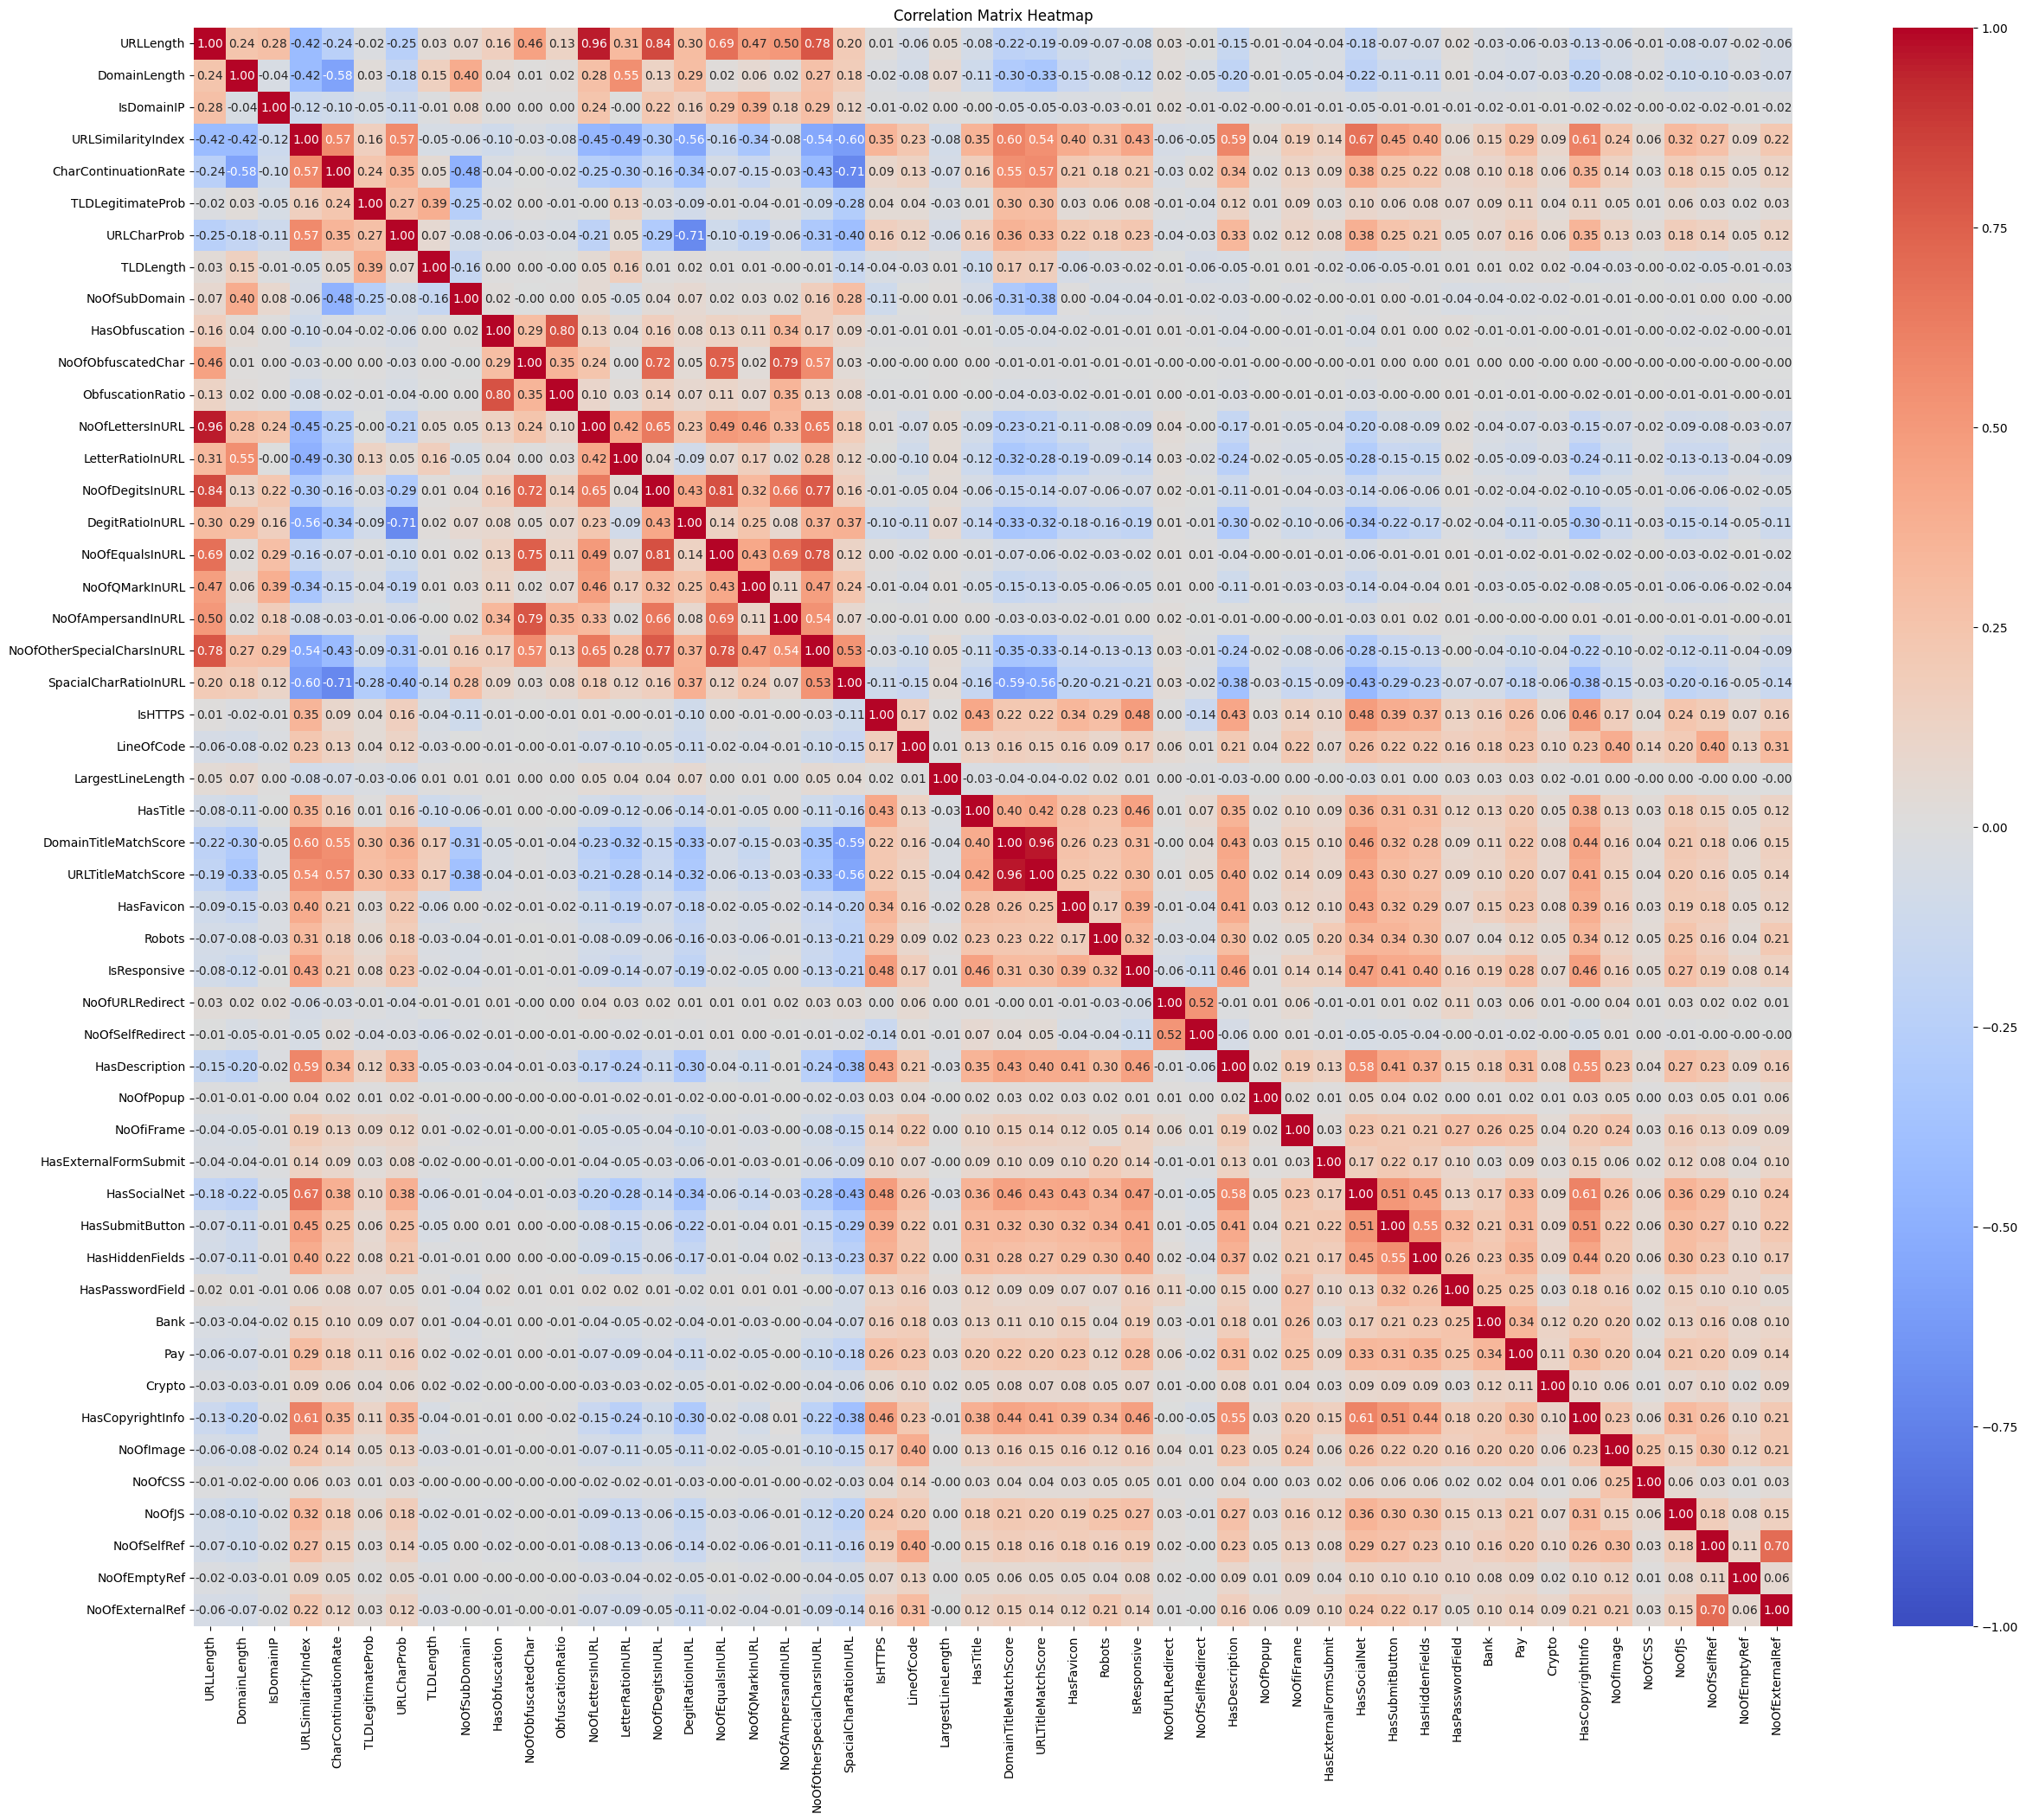

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Define threshold
threshold = 0.85

# Find pairs with high correlation
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Print out high correlation pairs
print("Pairs with high correlation (|correlation| > {:.2f}):".format(threshold))
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Let's drop columns: `NoOfLettersInURL`, `DomainTitleMatchScore`...

Let's acknowledge `URL` and `Domain` as unique identifiers, so we're gonna drop those as well.

In [18]:
columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'
    ]

# Ensure X_new contains only the specified columns (if they exist in df)
X_new = X[columns]  # This will select only the columns listed above

X_new.head()

,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,100.0,3,1,0,0,0,0,1,...,1,1,0,1,34,20,28,119,0,124
1,23,16,100.0,2,1,0,0,0,0,2,...,0,0,0,1,50,9,8,39,0,217
2,29,22,100.0,2,2,0,0,0,0,2,...,1,0,0,1,10,2,7,42,2,5
3,26,19,100.0,3,1,0,0,0,0,1,...,1,0,1,1,3,27,15,22,1,31
4,33,26,100.0,3,1,0,0,0,0,1,...,1,1,1,1,244,15,34,72,1,85


# Dimensionality Reduction

In [19]:
y.shape

(235795, 1)

In [20]:
X_new.shape

(235795, 34)

In [21]:
# proportion of target

proportions = y.value_counts(normalize=True)

# Display the proportions
print("Proportion of each class in y:")
print(proportions)

Proportion of each class in y:
label
1        0.571895
0        0.428105
Name: proportion, dtype: float64


In [22]:
data_new = pd.concat([y, X_new], axis=1)
data_new.head()

,label,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfDegitsInURL,NoOfEqualsInURL,NoOfAmpersandInURL,...,HasHiddenFields,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,1,31,24,100.0,3,1,0,0,0,0,...,1,1,0,1,34,20,28,119,0,124
1,1,23,16,100.0,2,1,0,0,0,0,...,0,0,0,1,50,9,8,39,0,217
2,1,29,22,100.0,2,2,0,0,0,0,...,1,0,0,1,10,2,7,42,2,5
3,1,26,19,100.0,3,1,0,0,0,0,...,1,0,1,1,3,27,15,22,1,31
4,1,33,26,100.0,3,1,0,0,0,0,...,1,1,1,1,244,15,34,72,1,85


In [23]:
data_sample = data_new.sample(n=5000, random_state=42)

y_new = data_sample.iloc[:, 0]     # Labels (First column)
X_new = data_sample.iloc[:, 1:]

print(y_new.value_counts(normalize=True)) # similar proportion! yay!

label
1    0.5682
0    0.4318
Name: proportion, dtype: float64


### PCA
- decent. separated phisihing data into two orthogonal vectors... but there's a lot of overlap between legitimate and phishing email labels.

In [24]:
# okay let's hope this pca runs!!!
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder


# If the labels are categorical, we need to convert them to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_new)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_new)


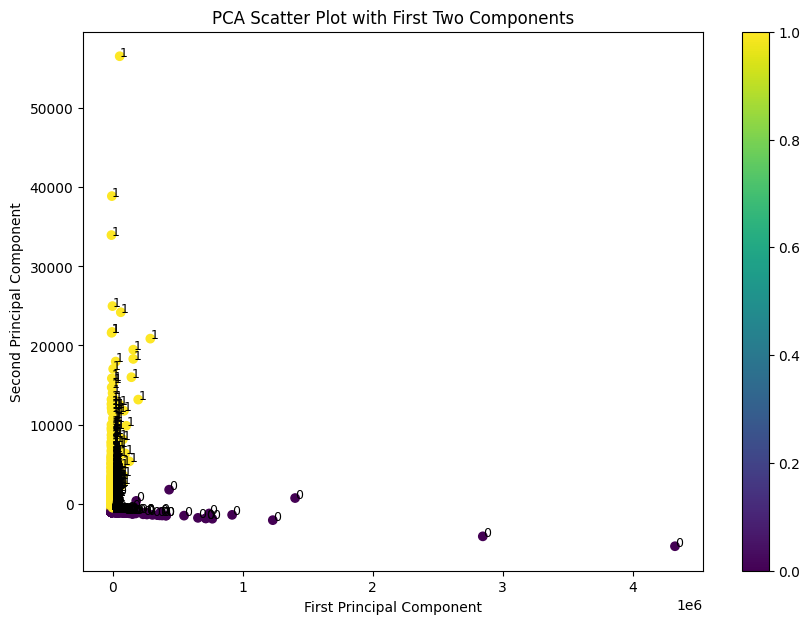

In [25]:
import numpy as np

np.random.seed(42)

X_sample_pca = np.random.choice(len(pca_result), size=100, replace=False)
pca_sample_result = pca_result[X_sample_pca]
y_sample_pca = y_new.iloc[X_sample_pca]

# Create a PCA scatter plot
plt.figure(figsize=(10, 7))
scatter_pca = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_encoded, cmap='viridis')
plt.title('PCA Scatter Plot with First Two Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Adding labels for PCA plot
for i, label in enumerate(y_new):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_pca)
plt.show()

### MDS
- bad

In [26]:
# Perform MDS to reduce to 2 components
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X_new)

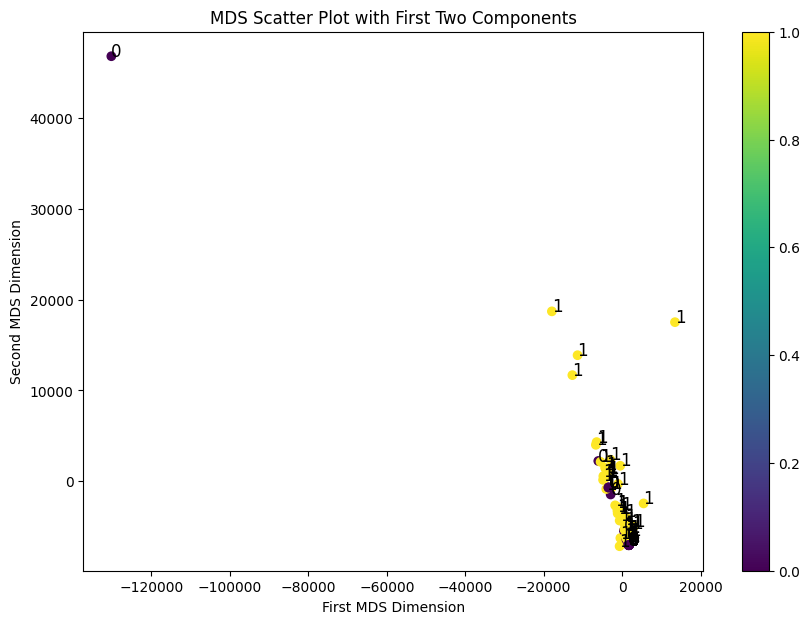

In [27]:
import numpy as np

# choose the samples from the MDS result
np.random.seed(42)

X_sample_mds = np.random.choice(len(mds_result), size=100, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_new.iloc[X_sample_mds]

# Create an MDS scatter plot
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(mds_sample_result[:, 0], mds_sample_result[:, 1], c=y_sample_mds, cmap='viridis')
plt.title('MDS Scatter Plot with First Two Components')
plt.xlabel('First MDS Dimension')
plt.ylabel('Second MDS Dimension')

# Adding labels for MDS plot
for i, label in enumerate(y_sample_mds):
    plt.text(mds_sample_result[i, 0], mds_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_mds)
plt.show()

### PCA
PCA separated phishing from nonphishing emails into two orthogonal vectors.

### MDS
MDS failed to separate any significant clusters.

# Nonlinear Dimensionality Reduction Techniques

### Isomap
- not great either

In [28]:
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE

isomap_result = Isomap(n_neighbors=10,n_components=2).fit_transform(X_new)

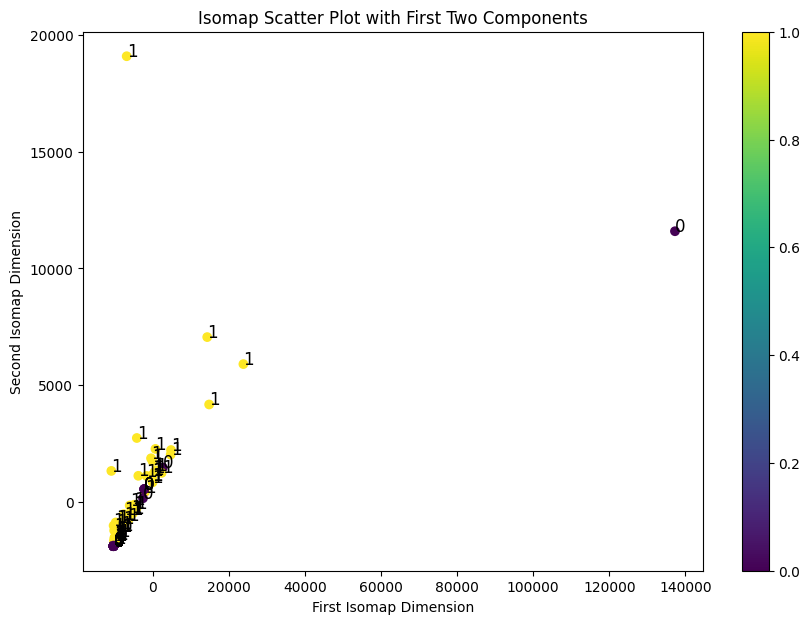

In [29]:
# choose the samples from the MDS result
np.random.seed(42)

X_sample_isomap = np.random.choice(len(isomap_result), size=100, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_new.iloc[X_sample_isomap]

# Create an Isomap scatter plot
plt.figure(figsize=(10, 7))
scatter_isomap = plt.scatter(isomap_sample_result[:, 0], isomap_sample_result[:, 1], c=y_sample_isomap, cmap='viridis')
plt.title('Isomap Scatter Plot with First Two Components')
plt.xlabel('First Isomap Dimension')
plt.ylabel('Second Isomap Dimension')

# Adding labels for Isomap plot
for i, label in enumerate(y_sample_isomap):
    plt.text(isomap_sample_result[i, 0], isomap_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_isomap)
plt.show()

### LLE
- not great either.

In [30]:
lle_result = LocallyLinearEmbedding(n_neighbors=12, n_components=2).fit_transform(X_new)

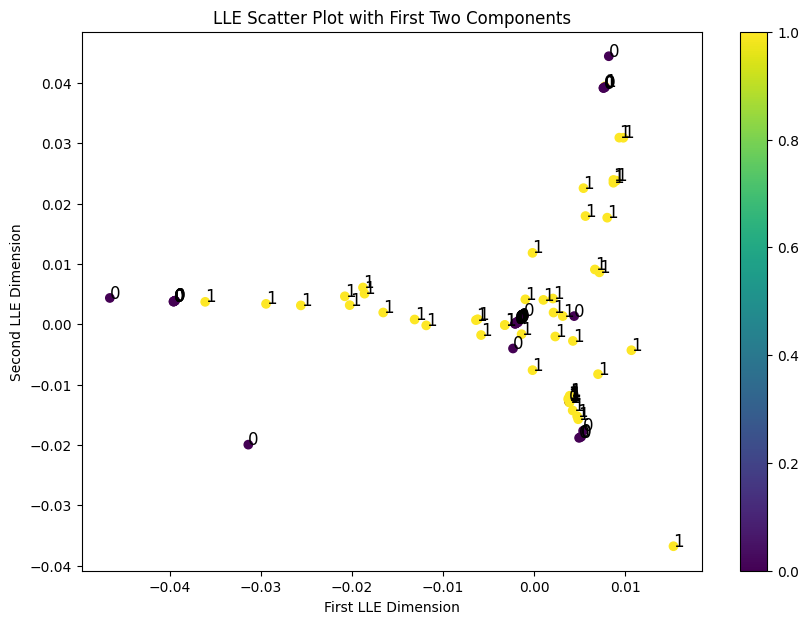

In [31]:
# choose the samples from the LLE result
np.random.seed(42)

X_sample_lle = np.random.choice(len(lle_result), size=100, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_new.iloc[X_sample_lle]

# Create an Locally Linear Embedding scatter plot
plt.figure(figsize=(10, 7))
scatter_lle = plt.scatter(lle_sample_result[:, 0], lle_sample_result[:, 1], c=y_sample_lle, cmap='viridis')
plt.title('LLE Scatter Plot with First Two Components')
plt.xlabel('First LLE Dimension')
plt.ylabel('Second LLE Dimension')

# Adding labels for LLE plot
for i, label in enumerate(y_sample_lle):
    plt.text(lle_sample_result[i, 0], lle_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_lle)
plt.show()

### t-SNE
- there's a clear separation between nonphishing and phishing data

In [37]:
tsne_result = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(X_new)


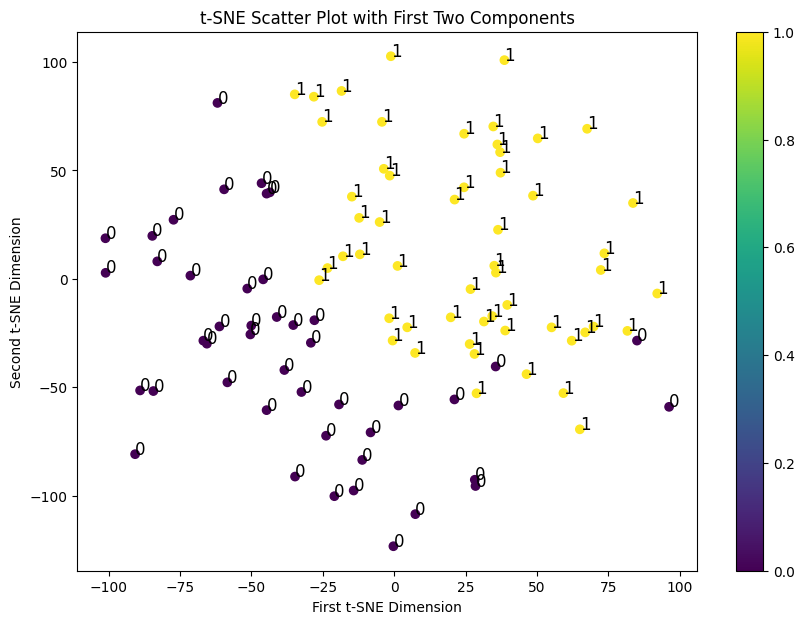

In [38]:
# choose the samples from the LLE result
np.random.seed(42)

X_sample_tsne = np.random.choice(len(tsne_result), size=100, replace=False)
tsne_sample_result = tsne_result[X_sample_tsne]
y_sample_tsne = y_new.iloc[X_sample_tsne]

# Create an t-SNE scatter plot
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(tsne_sample_result[:, 0], tsne_sample_result[:, 1], c=y_sample_tsne, cmap='viridis')
plt.title('t-SNE Scatter Plot with First Two Components')
plt.xlabel('First t-SNE Dimension')
plt.ylabel('Second t-SNE Dimension')

# Adding labels for t-SNE plot
for i, label in enumerate(y_sample_tsne):
    plt.text(tsne_sample_result[i, 0], tsne_sample_result[i, 1], str(label), fontsize=12)

plt.colorbar(scatter_tsne)
plt.show()

In [39]:
tsne_usage = pd.DataFrame(tsne_result)
tsne_usage.columns = ['P1', 'P2']

Clustering Analysis Authored by Cory Suzuki

So far, t-SNE has provided good dimensions to work with the data, so let's use it with some
clustering algorithms such as Agglomerative Clustering, KMeans, MiniBatch KMeans, and DBSCAN. Please note that other dimensionality-reduced data other than the t-SNE could be used here if they produce good separability between the class labels.

In [50]:
# Import necessary clustering libraries. 

from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from timeit import timeit

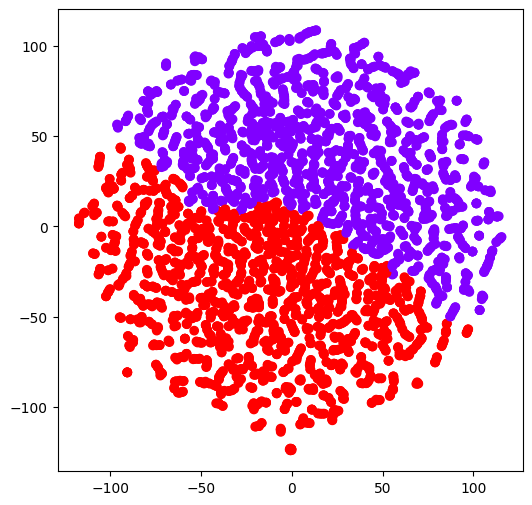

In [44]:
# Agglomerative Clustering 

aggl1 = AgglomerativeClustering(n_clusters=2)
aggl2 = AgglomerativeClustering(n_clusters=3)
aggl3 = AgglomerativeClustering(n_clusters=4)
aggl4 = AgglomerativeClustering(n_clusters=5)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = aggl1.fit_predict(tsne_usage), cmap='rainbow')
plt.show()

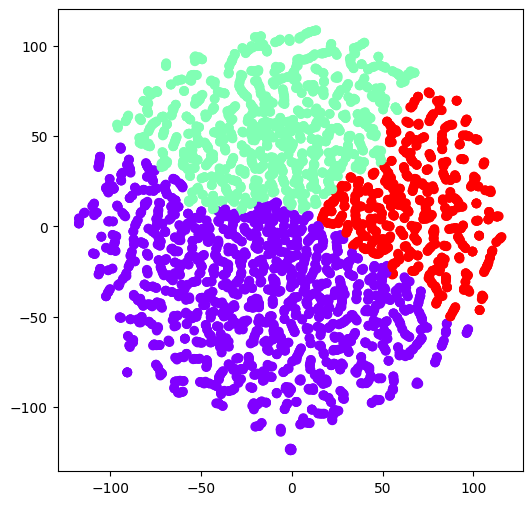

In [45]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = aggl2.fit_predict(tsne_usage), cmap='rainbow')
plt.show()

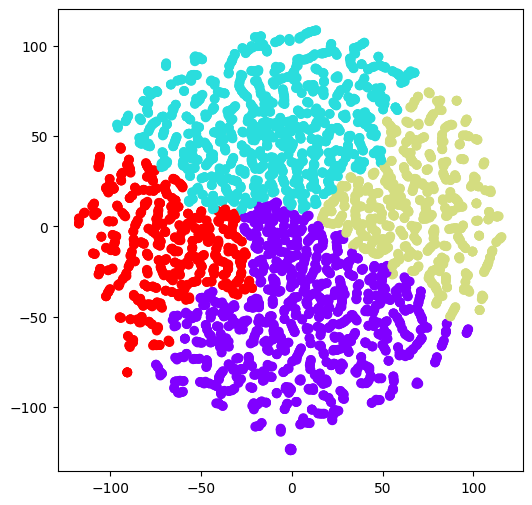

In [46]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = aggl3.fit_predict(tsne_usage), cmap='rainbow')
plt.show()

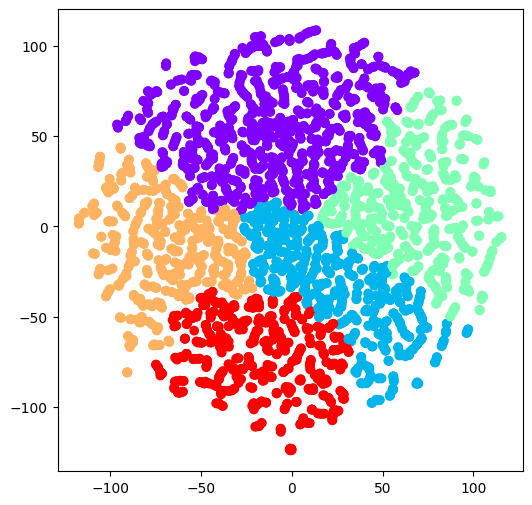

In [47]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = aggl4.fit_predict(tsne_usage), cmap='rainbow')
plt.show()

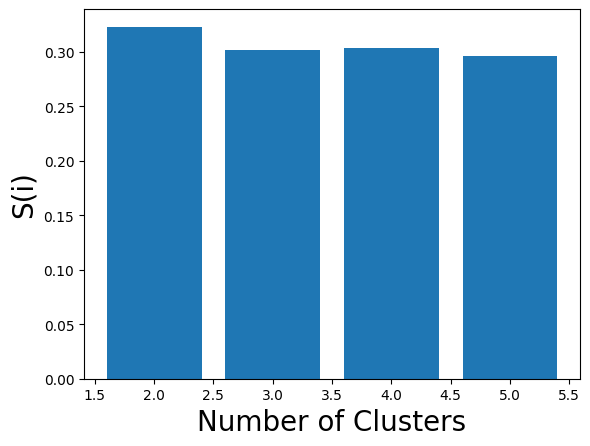

In [48]:
# Silhoutte Scores for Agglomerative Clustering

ks = [2,3,4,5]
silhouette_scores = []
silhouette_scores.append(
    silhouette_score(tsne_usage, aggl1.fit_predict(tsne_usage))
)
silhouette_scores.append(
    silhouette_score(tsne_usage, aggl2.fit_predict(tsne_usage))
)
silhouette_scores.append(
    silhouette_score(tsne_usage, aggl3.fit_predict(tsne_usage))
)
silhouette_scores.append(
    silhouette_score(tsne_usage, aggl4.fit_predict(tsne_usage))
)


plt.bar(ks, silhouette_scores)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

Therefore we know that the optimal number of clusters is 2 according to the silhouette score bar graph. This makes sense as our dataset classifies emails as either phishing spam or not.

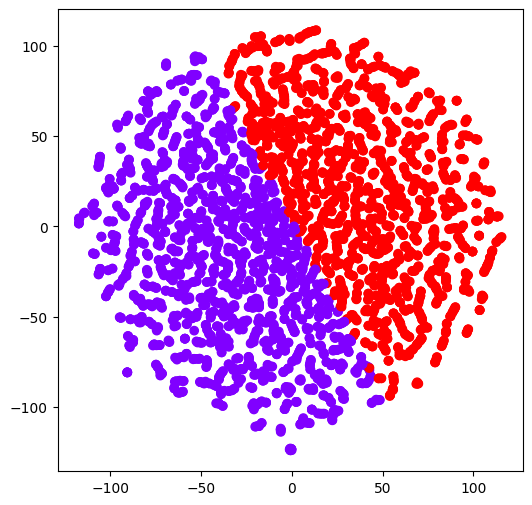

In [52]:
# KMeans and MiniBatch KMeans
k = 2
kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans.fit(tsne_usage)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = kmeans.fit_predict(tsne_usage), cmap='rainbow')
plt.show()

10/10

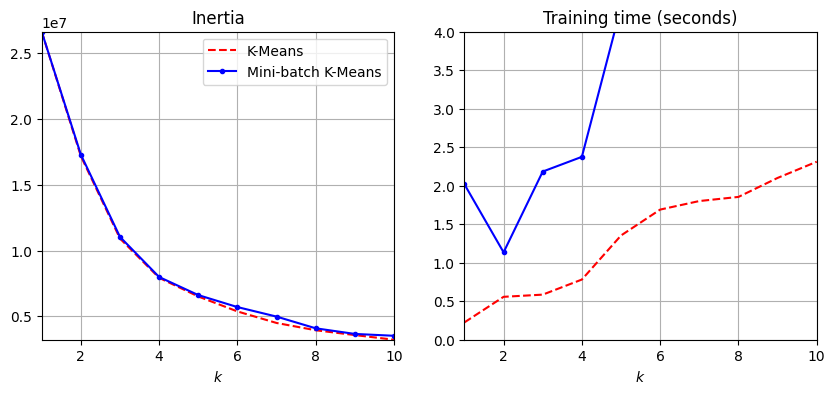

In [69]:
max_k = 10
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for j in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=j, n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=j, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[j - 1, 0] = timeit("kmeans_.fit_predict(tsne_usage)", number=10, globals=globals())
    times[j - 1, 1] = timeit("minibatch_kmeans.fit_predict(tsne_usage)", number=10,
                             globals=globals())
    inertias[j - 1, 0] = kmeans_.inertia_
    inertias[j - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, np.min(inertias), np.max(inertias)])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

From the inertia plot, it seems like the optimal k at the elbow point is 3.

[[-83.4241      7.2047143]
 [-47.23035    13.650453 ]
 [-43.430374   16.932932 ]
 ...
 [-55.134808  -15.868796 ]
 [ 20.128483   11.88357  ]
 [-66.104805  -36.42488  ]]


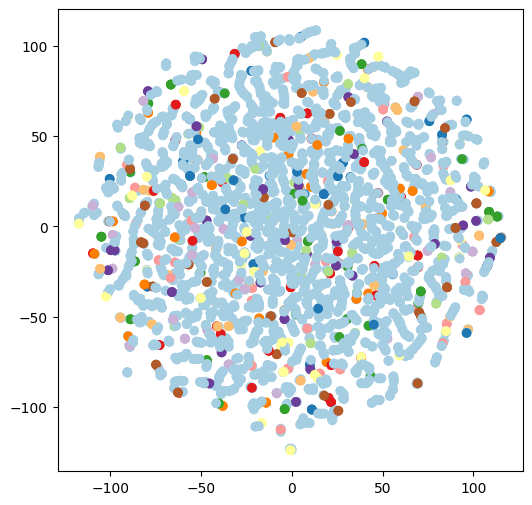

In [65]:
# DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=2)
dbscan.fit(tsne_usage)
print(dbscan.components_)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage['P1'], tsne_usage['P2'],
            c = dbscan.fit_predict(tsne_usage), cmap='Paired')
plt.show()

DBSCAN did not do well on clustering since it failed to classify the binary classes, however it seems as though KMeans performed the best since the separability is clearer, but Agglomerative Clustering
did a decent performance as well.